In [1]:
#################################################################################################################
# this script plots models with pvalue set for 95th CI. 
#
# By: Kwesi A. Quagraine (2019)
# 
#################################################################################################################

#For working with arrays: NumPy
import numpy as np
# For loading netCDF data
import netCDF4
# For calculating linear regression
import scipy.stats
# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.switch_backend('agg')
plt.rcParams['font.size'] = 12
plt.rcParams['hatch.linewidth'] = 0.1
# Datetime libraries for converting dates
from datetime import datetime, timedelta 

import xarray as xr
# for creating maps
from mpl_toolkits.basemap import Basemap

# Plots in iPython Notebook, not a pop-up window
%matplotlib inline

#high resolution plots
%config InlineBackend.figure_format = 'retina' 

import warnings
warnings.filterwarnings("ignore")

import sys

plotting starts 2019-06-20 12:17:28.547686
image saved at 2019-06-20 12:23:51.428172


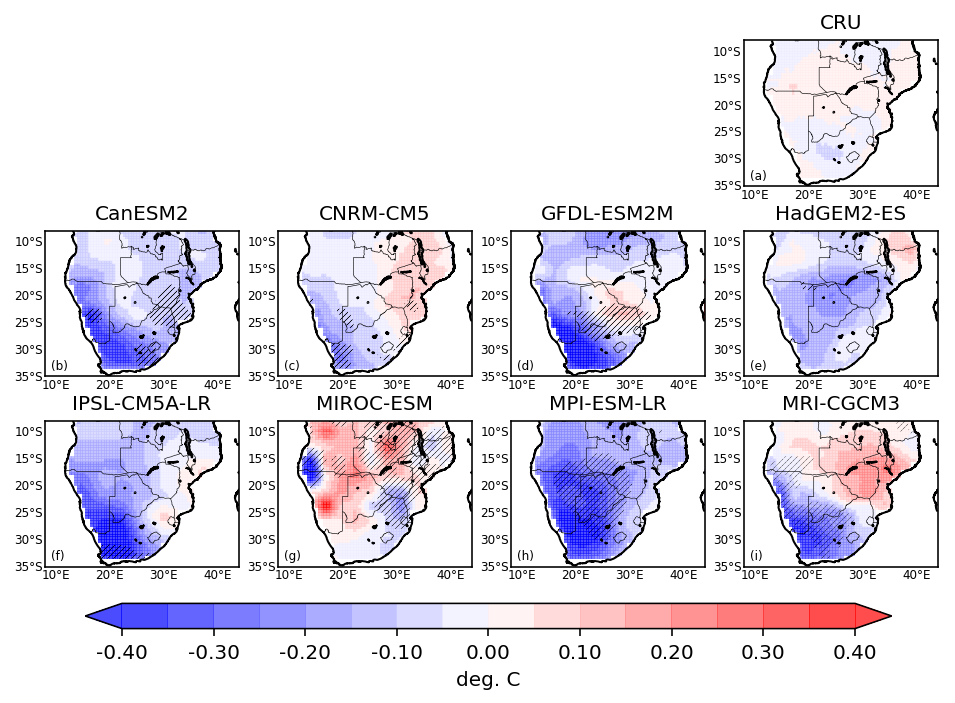

In [2]:
#%time
print('plotting starts', datetime.now())
vart = 'tas'
exp = 'rcp85'
period = '198001-201312'
var ='anom'
models2 = {}
pv = {}
pvar='pval_TheilSen'

anom_path = '/home/kwesi/terra/research/paper2/temp'

models = {1: 'CRU',2:'CanESM2',3:'CNRM-CM5',4:'GFDL-ESM2M',5:'HadGEM2-ES',  
          6:'IPSL-CM5A-LR',7:'MIROC-ESM', 8:'MPI-ESM-LR',9:'MRI-CGCM3'}

p_models = {1:'CanESM2',2:'CNRM-CM5',3:'GFDL-ESM2M',4:'HadGEM2-ES',  
          5:'IPSL-CM5A-LR',6:'MIROC-ESM', 7:'MPI-ESM-LR',8:'MRI-CGCM3'}

lab = {1: '(a)',2:'(b)',3:'(c)',4:'(d)',
       5:'(e)', 6:'(f)',7:'(g)', 8:'(h)', 9:'(i)'}


precip_dsets=[]
for i in models:
    anom_file = 'tas_Amon_%s_rcp85_r1i1p1_198001-201312.1_mm.masked.nc' %models[i]
    
    models2[i] = precip_dsets+[netCDF4.Dataset(anom_path + '/' + anom_file)]
    #print(models2)

pval_dsets=[]
for j in p_models:
    pval_file = 'tas_Amon_%s_rcp85_r1i1p1_198001-201312.1_pval.mask.nc' %p_models[j]
    
    pv[j] = pval_dsets+[netCDF4.Dataset(anom_path + '/' + pval_file)]
    #print(pv)

### for rainfall
#sys(rm -rf /Volumes/Maxtor/paper2/data/plots/ + 'gcm_' + vart + '_' + 'hist_' + exp + '_cond.1.png')


levels = np.arange(-0.3, 0.3, .05)
mmin = -0.4
mmax = 0.4
mlabel = 'deg. C'

    
plot_title = 'PC1 > +1 PC2 & PC3 < -1 STD  ' #+ '\n GCMs ' + period
fig=plt.figure(figsize=(8,7))
                         
count = 4
for i in models2: #sorted(models, key=str.lower):
    ax=fig.add_subplot(3,4,count)
    model = models2[i][0]
    
    ax.set_title(models[i],fontsize=10)
    ax.text(0.03,0.05, lab[i],transform=ax.transAxes,fontsize=6)
    ax = Basemap(projection='cyl',resolution='i',lat_0=20,lon_0=-25,
                     llcrnrlat=-35,urcrnrlat=-8,
                     llcrnrlon=8,urcrnrlon=44)
    # draw parallels and meridian on map
    ax.drawparallels(np.arange(-90.,91.,5),labels=[True,False,False,False], linewidth = 0.0,fontsize = 6)
    ax.drawmeridians(np.arange(-180.,181.,10),labels=[False,False,False,True], linewidth = 0.0,fontsize = 6)
    # mark geographic features
    ax.drawcountries(linewidth=0.3)
    ax.drawcoastlines()
    #ax.title(str(m))
    
    # get coordinates of data
    lons = model.variables['lon'][:]
    lats = model.variables['lat'][:]
    lons,lats=np.meshgrid(lons,lats)
    
        

    # read trend data
    node = model.variables[var][0,:,:]
    
    # overlay trend data
    #handel_mesh = ax.contour(lons,lats,node,n_levels=7,cmap='BrBG',extend='both',vmin=mmin,vmax=mmax)
    
    bounds = np.linspace(-0.4, 0.4, 17)

    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    handel_mesh = ax.pcolormesh(lons,lats,node,shading='flat',latlon=True,
                              alpha=0.7,norm=norm,cmap='bwr',vmin=mmin,vmax=mmax) #norm=norm,


    a = 5
    for j in pv:
        ax=fig.add_subplot(3,4,a)
        pvr = pv[j][0]
        baselons = pvr.variables['lon'][:]
        baselats = pvr.variables['lat'][:]
        alons, alats = np.meshgrid(baselons,baselats)
        pval = pvr.variables[pvar][:,:]
         ### Significant at 95% confidence level
        temp =np.ma.masked_where(pval<0.05,pval)
        
        ax.pcolor(alons,alats, temp, hatch='////////',alpha=0)
        a=a+1
        
    count = count + 1

    
# add legend
#                  ''' left,bottom,width,height'''
cbar_ax = fig.add_axes([0.16,0.18,0.7,0.025])
cbar = fig.colorbar(handel_mesh,format='%.2f',cax=cbar_ax,orientation='horizontal',label='deg. C',pad = 0.55,extend='both')

plt.subplots_adjust(wspace=0.2, hspace=-0.5)
    
image_name = 'gcm_' + vart + '_' + 'hist_' + exp + '_conda.1a.png'   
fig.savefig('/home/kwesi/terra/research/paper2/plots/' + image_name, dpi=400, bbox_inches='tight')
print('image saved at', datetime.now())    
#fig.clf()

plotting starts 2019-06-20 12:26:09.652635
image saved at 2019-06-20 12:34:04.099973


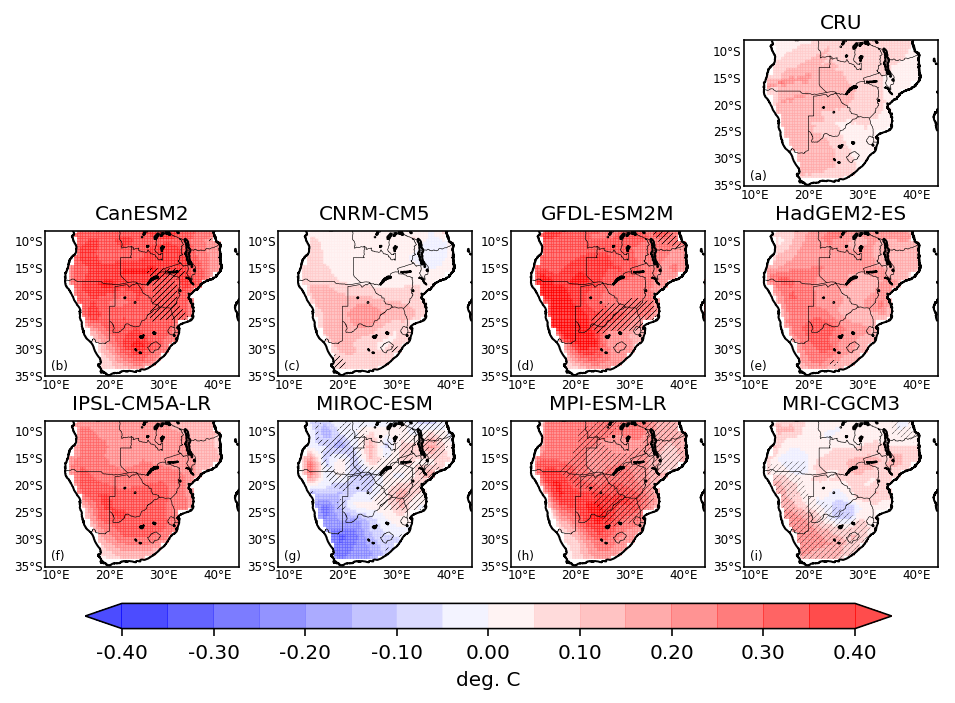

In [3]:
print('plotting starts', datetime.now())
vart = 'tas'
exp = 'rcp85'
period = '198001-201312'
var ='anom'
models2 = {}
pv = {}
pvar='pval_TheilSen'

anom_path = '/home/kwesi/terra/research/paper2/temp'

models = {1: 'CRU',2:'CanESM2',3:'CNRM-CM5',4:'GFDL-ESM2M',5:'HadGEM2-ES',  
          6:'IPSL-CM5A-LR',7:'MIROC-ESM', 8:'MPI-ESM-LR',9:'MRI-CGCM3'}

p_models = {1:'CanESM2',2:'CNRM-CM5',3:'GFDL-ESM2M',4:'HadGEM2-ES',  
          5:'IPSL-CM5A-LR',6:'MIROC-ESM', 7:'MPI-ESM-LR',8:'MRI-CGCM3'}

lab = {1: '(a)',2:'(b)',3:'(c)',4:'(d)',
       5:'(e)', 6:'(f)',7:'(g)', 8:'(h)', 9:'(i)'}



precip_dsets=[]
for i in models:
    anom_file = 'tas_Amon_%s_rcp85_r1i1p1_198001-201312.2_mm.masked.nc' %models[i]
    
    models2[i] = precip_dsets+[netCDF4.Dataset(anom_path + '/' + anom_file)]
    #print(models2)

pval_dsets=[]
for j in p_models:
    pval_file = 'tas_Amon_%s_rcp85_r1i1p1_198001-201312.2_pval.mask.nc' %p_models[j]
    
    pv[j] = pval_dsets+[netCDF4.Dataset(anom_path + '/' + pval_file)]
    #print(pv)



### for rainfall
#sys(rm -rf /Volumes/Maxtor/paper2/data/plots/ + 'gcm_' + vart + '_' + 'hist_' + exp + '_cond.1.png')

mmin = -0.4
mmax = 0.4
mlabel = 'deg. C'

    
plot_title = 'PC1 > +1 PC2 & PC3 < -1 STD  ' #+ '\n GCMs ' + period
fig=plt.figure(figsize=(8,7))
                         
count = 4
for i in models2: #sorted(models, key=str.lower):
    ax=fig.add_subplot(3,4,count)
    model = models2[i][0]
    
    ax.set_title(models[i],fontsize=10)
    ax.text(0.03,0.05, lab[i],transform=ax.transAxes,fontsize=6)
    ax = Basemap(projection='cyl',resolution='i',lat_0=20,lon_0=-25,
                     llcrnrlat=-35,urcrnrlat=-8,
                     llcrnrlon=8,urcrnrlon=44)
    # draw parallels and meridian on map
    ax.drawparallels(np.arange(-90.,91.,5),labels=[True,False,False,False], linewidth = 0.0,fontsize = 6)
    ax.drawmeridians(np.arange(-180.,181.,10),labels=[False,False,False,True], linewidth = 0.0,fontsize = 6)
    # mark geographic features
    ax.drawcountries(linewidth=0.3)
    ax.drawcoastlines()
    #ax.title(str(m))
    
    # get coordinates of data
    lons = model.variables['lon'][:]
    lats = model.variables['lat'][:]
    lons,lats=np.meshgrid(lons,lats)
    
        

    # read trend data
    node = model.variables[var][0,:,:]
    
    # overlay trend data
    #handel_mesh = ax.contour(lons,lats,node,n_levels=7,cmap='BrBG',extend='both',vmin=mmin,vmax=mmax)
    
    bounds = np.linspace(-0.4, 0.4, 17)

    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    handel_mesh = ax.pcolormesh(lons,lats,node,shading='flat',latlon=True,
                              alpha=0.7,norm=norm,cmap='bwr',vmin=mmin,vmax=mmax) #norm=norm,


    a = 5
    for j in pv:
        ax=fig.add_subplot(3,4,a)
        pvr = pv[j][0]
        baselons = pvr.variables['lon'][:]
        baselats = pvr.variables['lat'][:]
        alons, alats = np.meshgrid(baselons,baselats)
        pval = pvr.variables[pvar][:,:]
        temp =np.ma.masked_where(pval<0.05,pval)
        #test = np.isnan(temp)
        ax.pcolor(alons,alats, temp, hatch='////////',alpha=0)
        a=a+1
        
    count = count + 1

    
# add legend
#                  ''' left,bottom,width,height'''
cbar_ax = fig.add_axes([0.16,0.18,0.7,0.025])
cbar = fig.colorbar(handel_mesh,format='%.2f',cax=cbar_ax,orientation='horizontal',label='deg. C',pad = 0.55,extend='both')

plt.subplots_adjust(wspace=0.2, hspace=-0.5)
    
image_name = 'gcm_' + vart + '_' + 'hist_' + exp + '_conda.2a.png'   
fig.savefig('/home/kwesi/terra/research/paper2/plots/' + image_name, dpi=400, bbox_inches='tight')
print('image saved at', datetime.now())    
#fig.clf()

plotting starts 2019-06-20 12:36:57.635231
image saved at 2019-06-20 12:43:14.336603


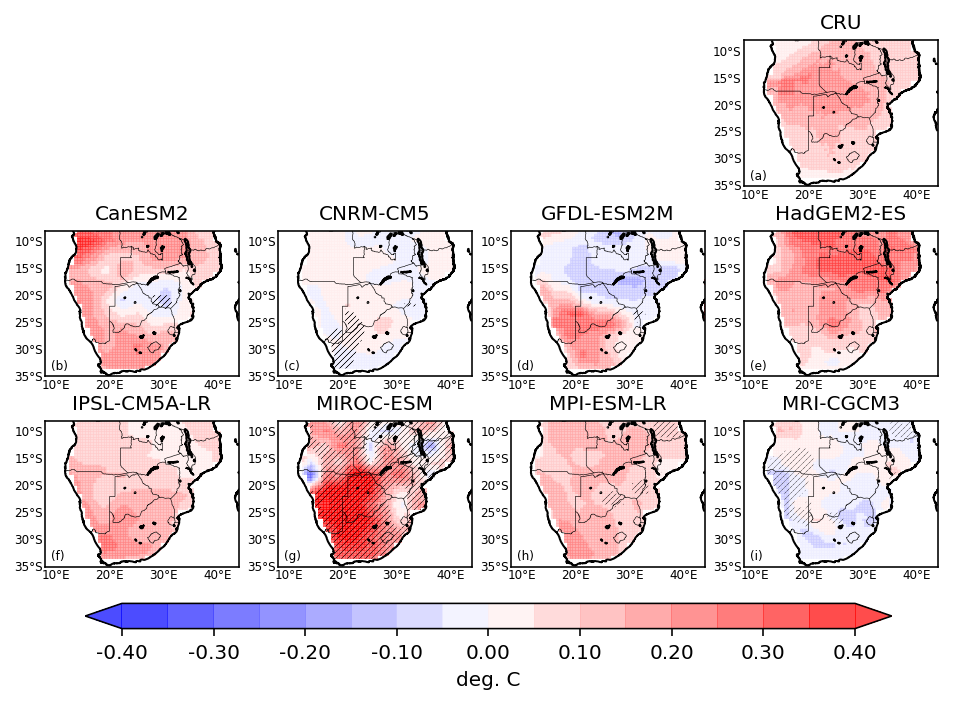

In [4]:
print('plotting starts', datetime.now())

vart = 'tas'
exp = 'rcp85'
period = '198001-201312'
var ='anom'
models2 = {}
pv = {}
pvar='pval_TheilSen'

anom_path = '/home/kwesi/terra/research/paper2/temp'

models = {1: 'CRU',2:'CanESM2',3:'CNRM-CM5',4:'GFDL-ESM2M',5:'HadGEM2-ES',  
          6:'IPSL-CM5A-LR',7:'MIROC-ESM', 8:'MPI-ESM-LR',9:'MRI-CGCM3'}

p_models = {1:'CanESM2',2:'CNRM-CM5',3:'GFDL-ESM2M',4:'HadGEM2-ES',  
          5:'IPSL-CM5A-LR',6:'MIROC-ESM', 7:'MPI-ESM-LR',8:'MRI-CGCM3'}

lab = {1: '(a)',2:'(b)',3:'(c)',4:'(d)',
       5:'(e)', 6:'(f)',7:'(g)', 8:'(h)', 9:'(i)'}



precip_dsets=[]
for i in models:
    anom_file = 'tas_Amon_%s_rcp85_r1i1p1_198001-201312.3_mm.masked.nc' %models[i]
    
    models2[i] = precip_dsets+[netCDF4.Dataset(anom_path + '/' + anom_file)]
    #print(models2)

pval_dsets=[]
for j in p_models:
    pval_file = 'tas_Amon_%s_rcp85_r1i1p1_198001-201312.3_pval.mask.nc' %p_models[j]
    
    pv[j] = pval_dsets+[netCDF4.Dataset(anom_path + '/' + pval_file)]
    #print(pv)



### for rainfall
#sys(rm -rf /Volumes/Maxtor/paper2/data/plots/ + 'gcm_' + vart + '_' + 'hist_' + exp + '_cond.1.png')

mmin = -0.4
mmax = 0.4
mlabel = 'deg. C'

    
plot_title = 'PC1 > +1 PC2 & PC3 < -1 STD  ' #+ '\n GCMs ' + period
fig=plt.figure(figsize=(8,7))
                         
count = 4
for i in models2: #sorted(models, key=str.lower):
    ax=fig.add_subplot(3,4,count)
    model = models2[i][0]
    
    ax.set_title(models[i],fontsize=10)
    ax.text(0.03,0.05, lab[i],transform=ax.transAxes,fontsize=6)
    ax = Basemap(projection='cyl',resolution='i',lat_0=20,lon_0=-25,
                     llcrnrlat=-35,urcrnrlat=-8,
                     llcrnrlon=8,urcrnrlon=44)
    # draw parallels and meridian on map
    ax.drawparallels(np.arange(-90.,91.,5),labels=[True,False,False,False], linewidth = 0.0,fontsize = 6)
    ax.drawmeridians(np.arange(-180.,181.,10),labels=[False,False,False,True], linewidth = 0.0,fontsize = 6)
    # mark geographic features
    ax.drawcountries(linewidth=0.3)
    ax.drawcoastlines()
    #ax.title(str(m))
    
    # get coordinates of data
    lons = model.variables['lon'][:]
    lats = model.variables['lat'][:]
    lons,lats=np.meshgrid(lons,lats)
    
        

    # read trend data
    node = model.variables[var][0,:,:]
    
    # overlay trend data
    #handel_mesh = ax.contour(lons,lats,node,n_levels=7,cmap='BrBG',extend='both',vmin=mmin,vmax=mmax)
    
    bounds = np.linspace(-0.4, 0.4, 17)

    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    handel_mesh = ax.pcolormesh(lons,lats,node,shading='flat',latlon=True,
                              alpha=0.7,norm=norm,cmap='bwr',vmin=mmin,vmax=mmax) #norm=norm,


    a = 5
    for j in pv:
        ax=fig.add_subplot(3,4,a)
        pvr = pv[j][0]
        baselons = pvr.variables['lon'][:]
        baselats = pvr.variables['lat'][:]
        alons, alats = np.meshgrid(baselons,baselats)
        pval = pvr.variables[pvar][:,:]
        temp =np.ma.masked_where(pval<0.05,pval)
        #test = np.isnan(temp)
        #ax.contourf(alons,alats, temp, latlon=True, hatches=['///////',None],colors='none',lw=0,alpha=0)
        ax.pcolor(alons,alats, temp, hatch='////////',alpha=0)
        a=a+1
        
    count = count + 1

    
# add legend
#                  ''' left,bottom,width,height'''
cbar_ax = fig.add_axes([0.16,0.18,0.7,0.025])
cbar = fig.colorbar(handel_mesh,format='%.2f',cax=cbar_ax,orientation='horizontal',label='deg. C',pad = 0.55,extend='both')

plt.subplots_adjust(wspace=0.2, hspace=-0.5)
    
image_name = 'gcm_' + vart + '_' + 'hist_' + exp + '_conda.7a.png'   
fig.savefig('/home/kwesi/terra/research/paper2/plots/' + image_name, dpi=400, bbox_inches='tight')
print('image saved at', datetime.now())    
#fig.clf()

plotting starts 2019-06-20 12:45:32.503305
image saved at 2019-06-20 12:52:42.772612


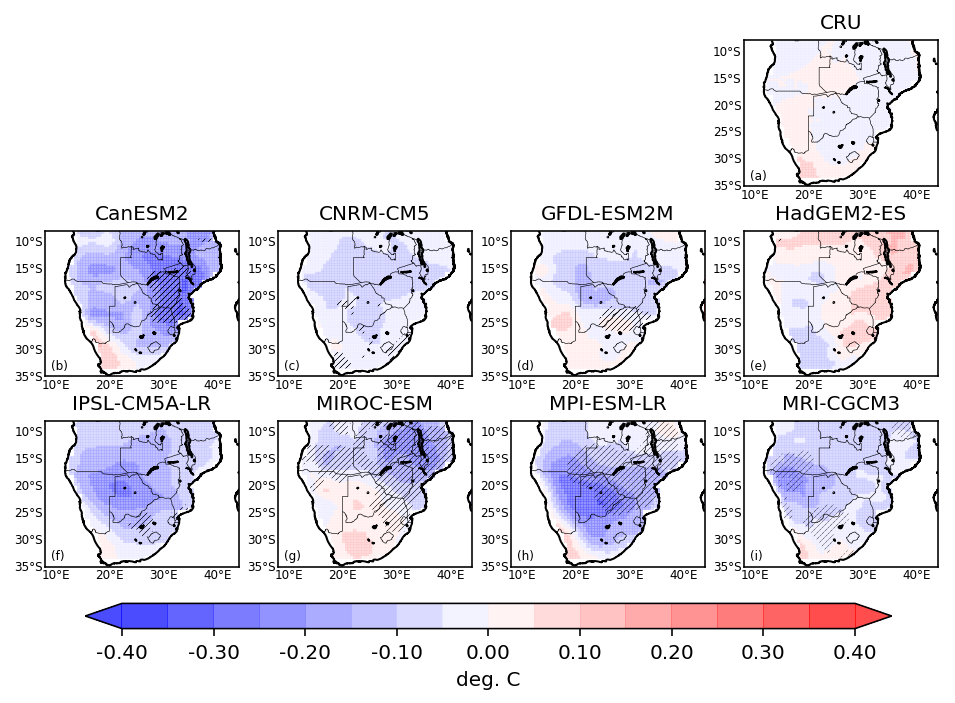

In [5]:
print('plotting starts', datetime.now())

vart = 'tas'
exp = 'rcp85'
period = '198001-201312'
var ='anom'
models2 = {}
pv = {}
pvar='pval_TheilSen'

anom_path = '/home/kwesi/terra/research/paper2/temp'

models = {1: 'CRU',2:'CanESM2',3:'CNRM-CM5',4:'GFDL-ESM2M',5:'HadGEM2-ES',  
          6:'IPSL-CM5A-LR',7:'MIROC-ESM', 8:'MPI-ESM-LR',9:'MRI-CGCM3'}

p_models = {1:'CanESM2',2:'CNRM-CM5',3:'GFDL-ESM2M',4:'HadGEM2-ES',  
          5:'IPSL-CM5A-LR',6:'MIROC-ESM', 7:'MPI-ESM-LR',8:'MRI-CGCM3'}

lab = {1: '(a)',2:'(b)',3:'(c)',4:'(d)',
       5:'(e)', 6:'(f)',7:'(g)', 8:'(h)', 9:'(i)'}



precip_dsets=[]
for i in models:
    anom_file = 'tas_Amon_%s_rcp85_r1i1p1_198001-201312.4_mm.masked.nc' %models[i]
    
    models2[i] = precip_dsets+[netCDF4.Dataset(anom_path + '/' + anom_file)]
    #print(models2)

pval_dsets=[]
for j in p_models:
    pval_file = 'tas_Amon_%s_rcp85_r1i1p1_198001-201312.4_pval.mask.nc' %p_models[j]
    
    pv[j] = pval_dsets+[netCDF4.Dataset(anom_path + '/' + pval_file)]
    #print(pv)



### for rainfall
#sys(rm -rf /Volumes/Maxtor/paper2/data/plots/ + 'gcm_' + vart + '_' + 'hist_' + exp + '_cond.1.png')

mmin = -0.4
mmax = 0.4
mlabel = 'deg. C'

    
plot_title = 'PC1 > +1 PC2 & PC3 < -1 STD  ' #+ '\n GCMs ' + period
fig=plt.figure(figsize=(8,7))
                         
count = 4
for i in models2: #sorted(models, key=str.lower):
    ax=fig.add_subplot(3,4,count)
    model = models2[i][0]
    
    ax.set_title(models[i],fontsize=10)
    ax.text(0.03,0.05, lab[i],transform=ax.transAxes,fontsize=6)
    ax = Basemap(projection='cyl',resolution='i',lat_0=20,lon_0=-25,
                     llcrnrlat=-35,urcrnrlat=-8,
                     llcrnrlon=8,urcrnrlon=44)
    # draw parallels and meridian on map
    ax.drawparallels(np.arange(-90.,91.,5),labels=[True,False,False,False], linewidth = 0.0,fontsize = 6)
    ax.drawmeridians(np.arange(-180.,181.,10),labels=[False,False,False,True], linewidth = 0.0,fontsize = 6)
    # mark geographic features
    ax.drawcountries(linewidth=0.3)
    ax.drawcoastlines()
    #ax.title(str(m))
    
    # get coordinates of data
    lons = model.variables['lon'][:]
    lats = model.variables['lat'][:]
    lons,lats=np.meshgrid(lons,lats)
    
        

    # read trend data
    node = model.variables[var][0,:,:]
    
    # overlay trend data
    #handel_mesh = ax.contour(lons,lats,node,n_levels=7,cmap='BrBG',extend='both',vmin=mmin,vmax=mmax)
    
    bounds = np.linspace(-0.4, 0.4, 17)

    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    handel_mesh = ax.pcolormesh(lons,lats,node,shading='flat',latlon=True,
                              alpha=0.7,norm=norm,cmap='bwr',vmin=mmin,vmax=mmax) #norm=norm,


    a = 5
    for j in pv:
        ax=fig.add_subplot(3,4,a)
        pvr = pv[j][0]
        baselons = pvr.variables['lon'][:]
        baselats = pvr.variables['lat'][:]
        alons, alats = np.meshgrid(baselons,baselats)
        pval = pvr.variables[pvar][:,:]
        temp =np.ma.masked_where(pval<0.05,pval)
        #test = np.isnan(temp)
        #ax.contourf(alons,alats, temp, latlon=True, hatches=['///////',None],colors='none',lw=0,alpha=0)
        ax.pcolor(alons,alats, temp, hatch='////////',alpha=0)
        a=a+1
        
    count = count + 1

    
# add legend
#                  ''' left,bottom,width,height'''
cbar_ax = fig.add_axes([0.16,0.18,0.7,0.025])
cbar = fig.colorbar(handel_mesh,format='%.2f',cax=cbar_ax,orientation='horizontal',label='deg. C',pad = 0.55,extend='both')

plt.subplots_adjust(wspace=0.2, hspace=-0.5)
    
image_name = 'gcm_' + vart + '_' + 'hist_' + exp + '_conda.8a.png'   
fig.savefig('/home/kwesi/terra/research/paper2/plots/' + image_name, dpi=400, bbox_inches='tight')
print('image saved at', datetime.now())    
#fig.clf()

plotting starts 2019-06-20 12:55:20.910843
image saved at 2019-06-20 13:01:53.069847


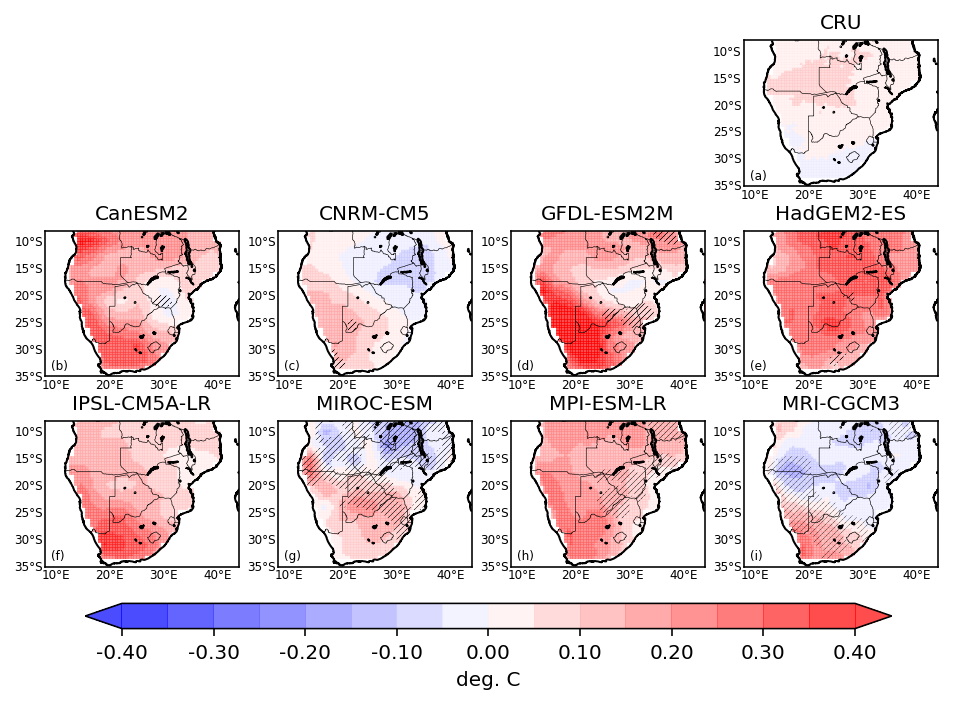

In [6]:
print('plotting starts', datetime.now())

vart = 'tas'
exp = 'rcp85'
period = '198001-201312'
var ='anom'
models2 = {}
pv = {}
pvar='pval_TheilSen'

anom_path = '/home/kwesi/terra/research/paper2/temp'

models = {1: 'CRU',2:'CanESM2',3:'CNRM-CM5',4:'GFDL-ESM2M',5:'HadGEM2-ES',  
          6:'IPSL-CM5A-LR',7:'MIROC-ESM', 8:'MPI-ESM-LR',9:'MRI-CGCM3'}

p_models = {1:'CanESM2',2:'CNRM-CM5',3:'GFDL-ESM2M',4:'HadGEM2-ES',  
          5:'IPSL-CM5A-LR',6:'MIROC-ESM', 7:'MPI-ESM-LR',8:'MRI-CGCM3'}

lab = {1: '(a)',2:'(b)',3:'(c)',4:'(d)',
       5:'(e)', 6:'(f)',7:'(g)', 8:'(h)', 9:'(i)'}



precip_dsets=[]
for i in models:
    anom_file = 'tas_Amon_%s_rcp85_r1i1p1_198001-201312.5_mm.masked.nc' %models[i]
    
    models2[i] = precip_dsets+[netCDF4.Dataset(anom_path + '/' + anom_file)]
    #print(models2)

pval_dsets=[]
for j in p_models:
    pval_file = 'tas_Amon_%s_rcp85_r1i1p1_198001-201312.5_pval.mask.nc' %p_models[j]
    
    pv[j] = pval_dsets+[netCDF4.Dataset(anom_path + '/' + pval_file)]
    #print(pv)



### for rainfall
#sys(rm -rf /Volumes/Maxtor/paper2/data/plots/ + 'gcm_' + vart + '_' + 'hist_' + exp + '_cond.1.png')

mmin = -0.4
mmax = 0.4
mlabel = 'deg. C'
    
plot_title = 'PC1 > +1 PC2 & PC3 < -1 STD  ' #+ '\n GCMs ' + period
fig=plt.figure(figsize=(8,7))
                         
count = 4
for i in models2: #sorted(models, key=str.lower):
    ax=fig.add_subplot(3,4,count)
    model = models2[i][0]
    
    ax.set_title(models[i],fontsize=10)
    ax.text(0.03,0.05, lab[i],transform=ax.transAxes,fontsize=6)
    ax = Basemap(projection='cyl',resolution='i',lat_0=20,lon_0=-25,
                     llcrnrlat=-35,urcrnrlat=-8,
                     llcrnrlon=8,urcrnrlon=44)
    # draw parallels and meridian on map
    ax.drawparallels(np.arange(-90.,91.,5),labels=[True,False,False,False], linewidth = 0.0,fontsize = 6)
    ax.drawmeridians(np.arange(-180.,181.,10),labels=[False,False,False,True], linewidth = 0.0,fontsize = 6)
    # mark geographic features
    ax.drawcountries(linewidth=0.3)
    ax.drawcoastlines()
    #ax.title(str(m))
    
    # get coordinates of data
    lons = model.variables['lon'][:]
    lats = model.variables['lat'][:]
    lons,lats=np.meshgrid(lons,lats)
    
        

    # read trend data
    node = model.variables[var][0,:,:]
    
    # overlay trend data
    #handel_mesh = ax.contour(lons,lats,node,n_levels=7,cmap='BrBG',extend='both',vmin=mmin,vmax=mmax)
    
    bounds = np.linspace(-0.4, 0.4, 17)

    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    handel_mesh = ax.pcolormesh(lons,lats,node,shading='flat',latlon=True,
                              alpha=0.7,norm=norm,cmap='bwr',vmin=mmin,vmax=mmax) #norm=norm,


    a = 5
    for j in pv:
        ax=fig.add_subplot(3,4,a)
        pvr = pv[j][0]
        baselons = pvr.variables['lon'][:]
        baselats = pvr.variables['lat'][:]
        alons, alats = np.meshgrid(baselons,baselats)
        pval = pvr.variables[pvar][:,:]
        temp =np.ma.masked_where(pval<0.05,pval)
        #test = np.isnan(temp)
        #ax.contourf(alons,alats, temp, latlon=True, hatches=['///////',None],colors='none',lw=0,alpha=0)
        ax.pcolor(alons,alats, temp, hatch='////////',alpha=0)
        a=a+1
        
    count = count + 1

    
# add legend
#                  ''' left,bottom,width,height'''
cbar_ax = fig.add_axes([0.16,0.18,0.7,0.025])
cbar = fig.colorbar(handel_mesh,format='%.2f',cax=cbar_ax,orientation='horizontal',label='deg. C',pad = 0.55,extend='both')

plt.subplots_adjust(wspace=0.2, hspace=-0.5)
    
image_name = 'gcm_' + vart + '_' + 'hist_' + exp + '_conda.5a.png'   
fig.savefig('/home/kwesi/terra/research/paper2/plots/' + image_name, dpi=400, bbox_inches='tight')
print('image saved at', datetime.now())    
#fig.clf()

plotting starts 2019-06-20 13:04:16.211257
image saved at 2019-06-20 13:11:33.751538


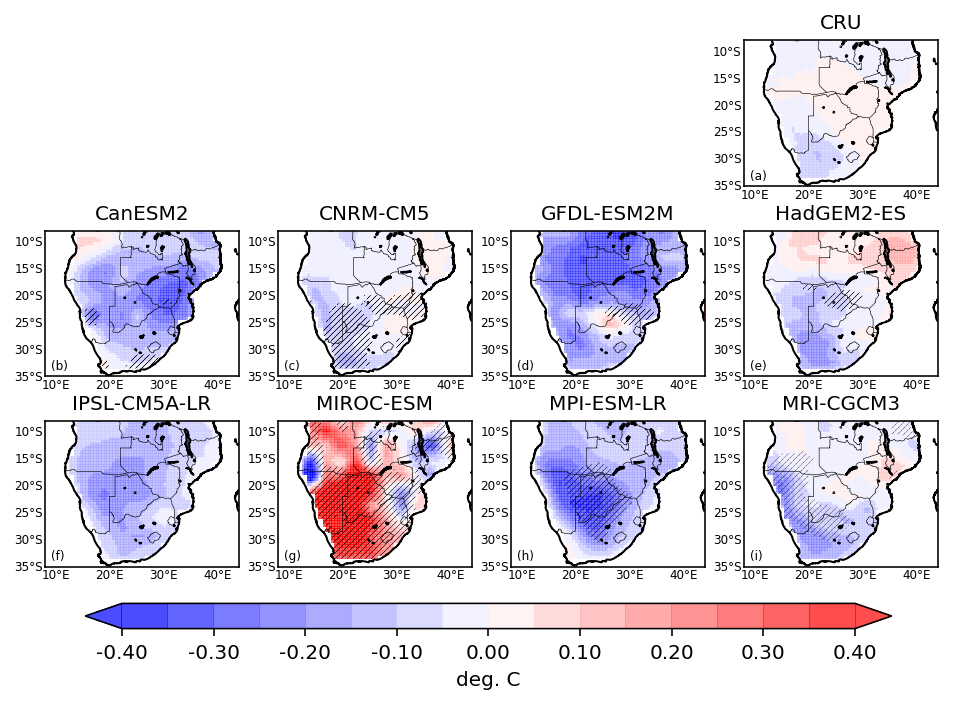

In [7]:
print('plotting starts', datetime.now())

vart = 'tas'
exp = 'rcp85'
period = '198001-201312'
var ='anom'
models2 = {}
pv = {}
pvar='pval_TheilSen'

anom_path = '/home/kwesi/terra/research/paper2/temp'

models = {1: 'CRU',2:'CanESM2',3:'CNRM-CM5',4:'GFDL-ESM2M',5:'HadGEM2-ES',  
          6:'IPSL-CM5A-LR',7:'MIROC-ESM', 8:'MPI-ESM-LR',9:'MRI-CGCM3'}

p_models = {1:'CanESM2',2:'CNRM-CM5',3:'GFDL-ESM2M',4:'HadGEM2-ES',  
          5:'IPSL-CM5A-LR',6:'MIROC-ESM', 7:'MPI-ESM-LR',8:'MRI-CGCM3'}

lab = {1: '(a)',2:'(b)',3:'(c)',4:'(d)',
       5:'(e)', 6:'(f)',7:'(g)', 8:'(h)', 9:'(i)'}



precip_dsets=[]
for i in models:
    anom_file = 'tas_Amon_%s_rcp85_r1i1p1_198001-201312.6_mm.masked.nc' %models[i]
    
    models2[i] = precip_dsets+[netCDF4.Dataset(anom_path + '/' + anom_file)]
    #print(models2)

pval_dsets=[]
for j in p_models:
    pval_file = 'tas_Amon_%s_rcp85_r1i1p1_198001-201312.6_pval.mask.nc' %p_models[j]
    
    pv[j] = pval_dsets+[netCDF4.Dataset(anom_path + '/' + pval_file)]
    #print(pv)



### for rainfall
#sys(rm -rf /Volumes/Maxtor/paper2/data/plots/ + 'gcm_' + vart + '_' + 'hist_' + exp + '_cond.1.png')

mmin = -0.4
mmax = 0.4
mlabel = 'deg. C'
    
plot_title = 'PC1 > +1 PC2 & PC3 < -1 STD  ' #+ '\n GCMs ' + period
fig=plt.figure(figsize=(8,7))
                         
count = 4
for i in models2: #sorted(models, key=str.lower):
    ax=fig.add_subplot(3,4,count)
    model = models2[i][0]
    
    ax.set_title(models[i],fontsize=10)
    ax.text(0.03,0.05, lab[i],transform=ax.transAxes,fontsize=6)
    ax = Basemap(projection='cyl',resolution='i',lat_0=20,lon_0=-25,
                     llcrnrlat=-35,urcrnrlat=-8,
                     llcrnrlon=8,urcrnrlon=44)
    # draw parallels and meridian on map
    ax.drawparallels(np.arange(-90.,91.,5),labels=[True,False,False,False], linewidth = 0.0,fontsize = 6)
    ax.drawmeridians(np.arange(-180.,181.,10),labels=[False,False,False,True], linewidth = 0.0,fontsize = 6)
    # mark geographic features
    ax.drawcountries(linewidth=0.3)
    ax.drawcoastlines()
    #ax.title(str(m))
    
    # get coordinates of data
    lons = model.variables['lon'][:]
    lats = model.variables['lat'][:]
    lons,lats=np.meshgrid(lons,lats)
    
        

    # read trend data
    node = model.variables[var][0,:,:]
    
    # overlay trend data
    #handel_mesh = ax.contour(lons,lats,node,n_levels=7,cmap='BrBG',extend='both',vmin=mmin,vmax=mmax)
    
    bounds = np.linspace(-0.4, 0.4, 17)

    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    handel_mesh = ax.pcolormesh(lons,lats,node,shading='flat',latlon=True,
                              alpha=0.7,norm=norm,cmap='bwr',vmin=mmin,vmax=mmax) #norm=norm,


    a = 5
    for j in pv:
        ax=fig.add_subplot(3,4,a)
        pvr = pv[j][0]
        baselons = pvr.variables['lon'][:]
        baselats = pvr.variables['lat'][:]
        alons, alats = np.meshgrid(baselons,baselats)
        pval = pvr.variables[pvar][:,:]
        temp =np.ma.masked_where(pval<0.05,pval)
        #test = np.isnan(temp)
        #ax.contourf(alons,alats, temp, latlon=True, hatches=['///////',None],colors='none',lw=0,alpha=0)
        ax.pcolor(alons,alats, temp, hatch='////////',alpha=0)
        a=a+1
        
    count = count + 1

    
# add legend
#                  ''' left,bottom,width,height'''
cbar_ax = fig.add_axes([0.16,0.18,0.7,0.025])
cbar = fig.colorbar(handel_mesh,format='%.2f',cax=cbar_ax,orientation='horizontal',label='deg. C',pad = 0.55,extend='both')

plt.subplots_adjust(wspace=0.2, hspace=-0.5)
    
image_name = 'gcm_' + vart + '_' + 'hist_' + exp + '_conda.6a.png'   
fig.savefig('/home/kwesi/terra/research/paper2/plots/' + image_name, dpi=400, bbox_inches='tight')
print('image saved at', datetime.now())    
#fig.clf()

plotting starts 2019-06-20 13:14:15.379130
image saved at 2019-06-20 13:21:55.581081


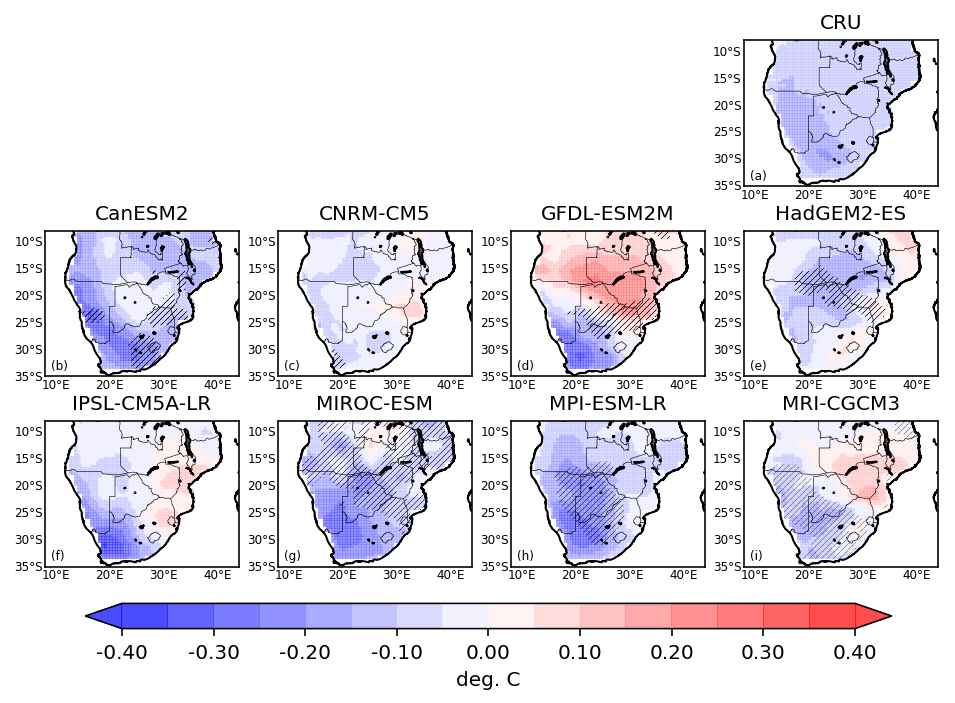

In [8]:
print('plotting starts', datetime.now())

vart = 'tas'
exp = 'rcp85'
period = '198001-201312'
var ='anom'
models2 = {}
pv = {}
pvar='pval_TheilSen'

anom_path = '/home/kwesi/terra/research/paper2/temp'

models = {1: 'CRU',2:'CanESM2',3:'CNRM-CM5',4:'GFDL-ESM2M',5:'HadGEM2-ES',  
          6:'IPSL-CM5A-LR',7:'MIROC-ESM', 8:'MPI-ESM-LR',9:'MRI-CGCM3'}

p_models = {1:'CanESM2',2:'CNRM-CM5',3:'GFDL-ESM2M',4:'HadGEM2-ES',  
          5:'IPSL-CM5A-LR',6:'MIROC-ESM', 7:'MPI-ESM-LR',8:'MRI-CGCM3'}

lab = {1: '(a)',2:'(b)',3:'(c)',4:'(d)',
       5:'(e)', 6:'(f)',7:'(g)', 8:'(h)', 9:'(i)'}



precip_dsets=[]
for i in models:
    anom_file = 'tas_Amon_%s_rcp85_r1i1p1_198001-201312.7_mm.masked.nc' %models[i]
    
    models2[i] = precip_dsets+[netCDF4.Dataset(anom_path + '/' + anom_file)]
    #print(models2)

pval_dsets=[]
for j in p_models:
    pval_file = 'tas_Amon_%s_rcp85_r1i1p1_198001-201312.7_pval.mask.nc' %p_models[j]
    
    pv[j] = pval_dsets+[netCDF4.Dataset(anom_path + '/' + pval_file)]
    #print(pv)



### for rainfall
#sys(rm -rf /Volumes/Maxtor/paper2/data/plots/ + 'gcm_' + vart + '_' + 'hist_' + exp + '_cond.1.png')

mmin = -0.4
mmax = 0.4
mlabel = 'deg. C'
    
plot_title = 'PC1 > +1 PC2 & PC3 < -1 STD  ' #+ '\n GCMs ' + period
fig=plt.figure(figsize=(8,7))
                         
count = 4
for i in models2: #sorted(models, key=str.lower):
    ax=fig.add_subplot(3,4,count)
    model = models2[i][0]
    
    ax.set_title(models[i],fontsize=10)
    ax.text(0.03,0.05, lab[i],transform=ax.transAxes,fontsize=6)
    ax = Basemap(projection='cyl',resolution='i',lat_0=20,lon_0=-25,
                     llcrnrlat=-35,urcrnrlat=-8,
                     llcrnrlon=8,urcrnrlon=44)
    # draw parallels and meridian on map
    ax.drawparallels(np.arange(-90.,91.,5),labels=[True,False,False,False], linewidth = 0.0,fontsize = 6)
    ax.drawmeridians(np.arange(-180.,181.,10),labels=[False,False,False,True], linewidth = 0.0,fontsize = 6)
    # mark geographic features
    ax.drawcountries(linewidth=0.3)
    ax.drawcoastlines()
    #ax.title(str(m))
    
    # get coordinates of data
    lons = model.variables['lon'][:]
    lats = model.variables['lat'][:]
    lons,lats=np.meshgrid(lons,lats)
    
        

    # read trend data
    node = model.variables[var][0,:,:]
    
    # overlay trend data
    #handel_mesh = ax.contour(lons,lats,node,n_levels=7,cmap='BrBG',extend='both',vmin=mmin,vmax=mmax)
    
    bounds = np.linspace(-0.4, 0.4, 17)

    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    handel_mesh = ax.pcolormesh(lons,lats,node,shading='flat',latlon=True,
                              alpha=0.7,norm=norm,cmap='bwr',vmin=mmin,vmax=mmax) #norm=norm,


    a = 5
    for j in pv:
        ax=fig.add_subplot(3,4,a)
        pvr = pv[j][0]
        baselons = pvr.variables['lon'][:]
        baselats = pvr.variables['lat'][:]
        alons, alats = np.meshgrid(baselons,baselats)
        pval = pvr.variables[pvar][:,:]
        temp =np.ma.masked_where(pval<0.05,pval)
        #test = np.isnan(temp)
        #ax.contourf(alons,alats, temp, latlon=True, hatches=['///////',None],colors='none',lw=0,alpha=0)
        ax.pcolor(alons,alats, temp, hatch='////////',alpha=0)
        a=a+1
        
    count = count + 1

    
# add legend
#                  ''' left,bottom,width,height'''
cbar_ax = fig.add_axes([0.16,0.18,0.7,0.025])
cbar = fig.colorbar(handel_mesh,format='%.2f',cax=cbar_ax,orientation='horizontal',label='deg. C',pad = 0.55,extend='both')

plt.subplots_adjust(wspace=0.2, hspace=-0.5)
    
image_name = 'gcm_' + vart + '_' + 'hist_' + exp + '_conda.3a.png'   
fig.savefig('/home/kwesi/terra/research/paper2/plots/' + image_name, dpi=400, bbox_inches='tight')
print('image saved at', datetime.now())    
#fig.clf()

In [ ]:
print('plotting starts', datetime.now())

vart = 'tas'
exp = 'rcp85'
period = '198001-201312'
var ='anom'
models2 = {}
pv = {}
pvar='pval_TheilSen'

anom_path = '/home/kwesi/terra/research/paper2/temp'

models = {1: 'CRU',2:'CanESM2',3:'CNRM-CM5',4:'GFDL-ESM2M',5:'HadGEM2-ES',  
          6:'IPSL-CM5A-LR',7:'MIROC-ESM', 8:'MPI-ESM-LR',9:'MRI-CGCM3'}

p_models = {1:'CanESM2',2:'CNRM-CM5',3:'GFDL-ESM2M',4:'HadGEM2-ES',  
          5:'IPSL-CM5A-LR',6:'MIROC-ESM', 7:'MPI-ESM-LR',8:'MRI-CGCM3'}

lab = {1: '(a)',2:'(b)',3:'(c)',4:'(d)',
       5:'(e)', 6:'(f)',7:'(g)', 8:'(h)', 9:'(i)'}



precip_dsets=[]
for i in models:
    anom_file = 'tas_Amon_%s_rcp85_r1i1p1_198001-201312.8_mm.masked.nc' %models[i]
    
    models2[i] = precip_dsets+[netCDF4.Dataset(anom_path + '/' + anom_file)]
    #print(models2)

pval_dsets=[]
for j in p_models:
    pval_file = 'tas_Amon_%s_rcp85_r1i1p1_198001-201312.8_pval.mask.nc' %p_models[j]
    
    pv[j] = pval_dsets+[netCDF4.Dataset(anom_path + '/' + pval_file)]
    #print(pv)



### for rainfall
#sys(rm -rf /Volumes/Maxtor/paper2/data/plots/ + 'gcm_' + vart + '_' + 'hist_' + exp + '_cond.1.png')

mmin = -0.4
mmax = 0.4
mlabel = 'deg. C'
    
plot_title = 'PC1 > +1 PC2 & PC3 < -1 STD  ' #+ '\n GCMs ' + period
fig=plt.figure(figsize=(8,7))
                         
count = 4
for i in models2: #sorted(models, key=str.lower):
    ax=fig.add_subplot(3,4,count)
    model = models2[i][0]
    
    ax.set_title(models[i],fontsize=10)
    ax.text(0.03,0.05, lab[i],transform=ax.transAxes,fontsize=6)
    ax = Basemap(projection='cyl',resolution='i',lat_0=20,lon_0=-25,
                     llcrnrlat=-35,urcrnrlat=-8,
                     llcrnrlon=8,urcrnrlon=44)
    # draw parallels and meridian on map
    ax.drawparallels(np.arange(-90.,91.,5),labels=[True,False,False,False], linewidth = 0.0,fontsize = 6)
    ax.drawmeridians(np.arange(-180.,181.,10),labels=[False,False,False,True], linewidth = 0.0,fontsize = 6)
    # mark geographic features
    ax.drawcountries(linewidth=0.3)
    ax.drawcoastlines()
    #ax.title(str(m))
    
    # get coordinates of data
    lons = model.variables['lon'][:]
    lats = model.variables['lat'][:]
    lons,lats=np.meshgrid(lons,lats)
    
        

    # read trend data
    node = model.variables[var][0,:,:]
    
    # overlay trend data
    #handel_mesh = ax.contour(lons,lats,node,n_levels=7,cmap='BrBG',extend='both',vmin=mmin,vmax=mmax)
    
    bounds = np.linspace(-0.4, 0.4, 17)

    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    handel_mesh = ax.pcolormesh(lons,lats,node,shading='flat',latlon=True,
                              alpha=0.7,norm=norm,cmap='bwr',vmin=mmin,vmax=mmax) #norm=norm,


    a = 5
    for j in pv:
        ax=fig.add_subplot(3,4,a)
        pvr = pv[j][0]
        baselons = pvr.variables['lon'][:]
        baselats = pvr.variables['lat'][:]
        alons, alats = np.meshgrid(baselons,baselats)
        pval = pvr.variables[pvar][:,:]
        temp =np.ma.masked_where(pval<0.05,pval)
        #test = np.isnan(temp)
        #ax.contourf(alons,alats, temp, latlon=True, hatches=['///////',None],colors='none',lw=0,alpha=0)
        ax.pcolor(alons,alats, temp, hatch='////////',alpha=0)
        a=a+1
        
    count = count + 1

    
# add legend
#                  ''' left,bottom,width,height'''
cbar_ax = fig.add_axes([0.16,0.18,0.7,0.025])
cbar = fig.colorbar(handel_mesh,format='%.2f',cax=cbar_ax,orientation='horizontal',label='deg. C',pad = 0.55,extend='both')

plt.subplots_adjust(wspace=0.2, hspace=-0.5)
    
image_name = 'gcm_' + vart + '_' + 'hist_' + exp + '_conda.4a.png'   
fig.savefig('/home/kwesi/terra/research/paper2/plots/' + image_name, dpi=400, bbox_inches='tight')
print('image saved at', datetime.now())    
#fig.clf()

plotting starts 2019-06-20 13:24:48.864727
image saved at 2019-06-20 13:34:49.919960
